# 🛠 01. Neural network regression with TensorFlow Exercises
1. Create your own regression dataset (or make the one we created in "Create data to view and fit" bigger) and build fit a model to it.
2. Try building a neural network with 4 Dense layers and fitting it to your own regression dataset, how does it perform?
3. Try and improve the results we got on the insurance dataset, some things you might want to try include:
4. Building a larger model (how does one with 4 dense layers go?).
5. Increasing the number of units in each layer.
6. Lookup the documentation of Adam and find out what the first parameter is, what happens if you increase it by 10x?
7. What happens if you train for longer (say 300 epochs instead of 200)?
8. Import the Boston pricing dataset from TensorFlow tf.keras.datasets and model it.

In [110]:
# Import the necessary libraries
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split as split
from tensorflow.keras import layers

In [27]:
# Read the data
reg_data = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
reg_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [28]:
# Inspect the data
reg_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [29]:
# Check the null values
reg_data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [33]:
# Check the correlation of the featues with the columns
reg_data.corr()['charges']

<ipython-input-33-33f5567ddaa8>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  reg_data.corr()['charges']


age         0.299008
bmi         0.198341
children    0.067998
charges     1.000000
Name: charges, dtype: float64

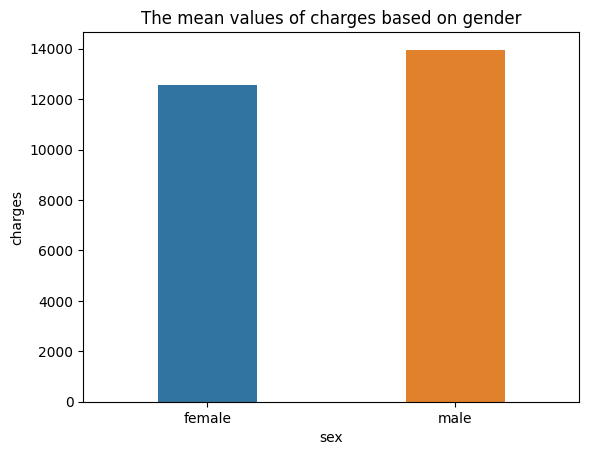

In [64]:
# Plot the mean of charges based on the gender
import seaborn as sns
charge_by_gender = reg_data.groupby('sex')['charges'].mean()

charge_by_gender
sns.barplot(x = charge_by_gender.index,
            y = charge_by_gender.values,
            hue = charge_by_gender.index,
            width = 0.4)
plt.title('The mean values of charges based on gender')
plt.ylabel('charges')
plt.show()

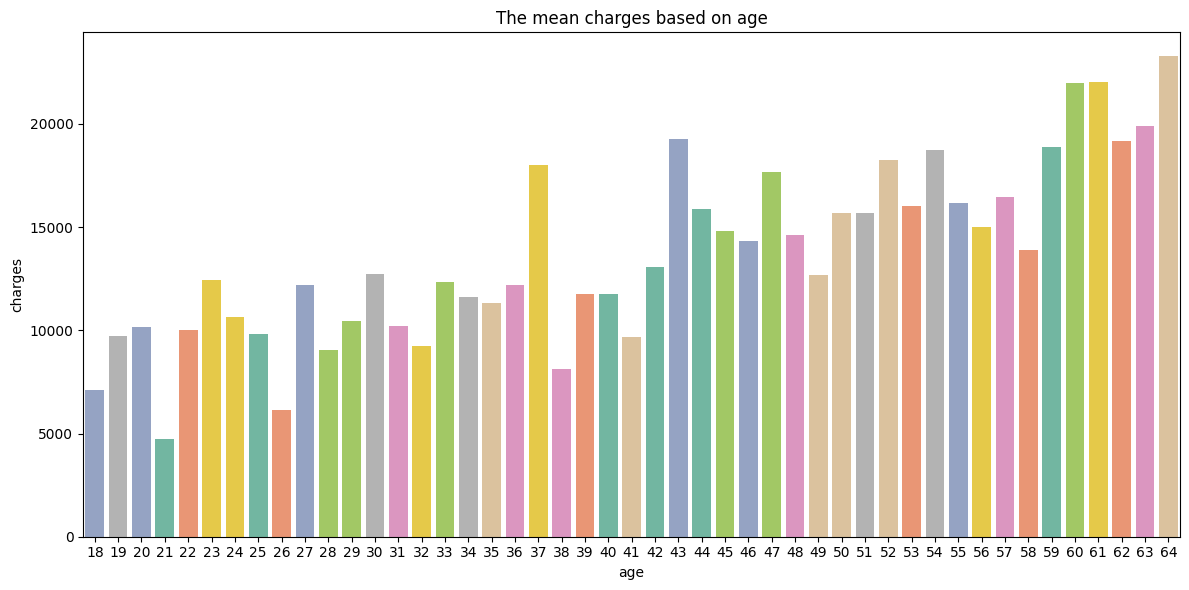

In [77]:
# what are the charges based on the age?
charge_by_age = reg_data.groupby('age')['charges'].mean()

charge_by_age
plt.figure(figsize = (12, 6))
sns.barplot(x = charge_by_age.index,
            y = charge_by_age.values,
            hue = charge_by_age.values,
            palette = 'Set2',
            legend = False)
plt.title('The mean charges based on age')
plt.ylabel('charges')
plt.tight_layout()
plt.show()

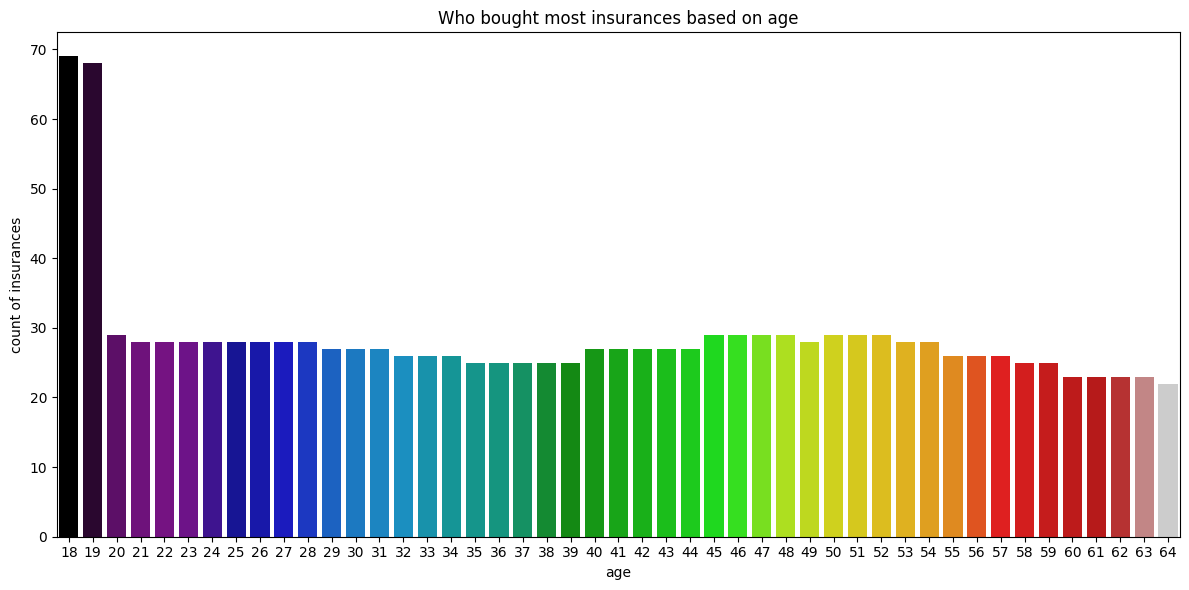

In [81]:
# Which group of ages bought most insurances ?
insurance_count_age_group = reg_data.groupby('age')['charges'].count()

insurance_count_age_group
plt.figure(figsize = (12, 6))
sns.barplot(x = insurance_count_age_group.index,
            y = insurance_count_age_group.values,
            hue = insurance_count_age_group.index,
            palette = 'nipy_spectral',
            legend = False)
plt.title('Who bought most insurances based on age')
plt.ylabel('count of insurances')
plt.tight_layout()
plt.show()

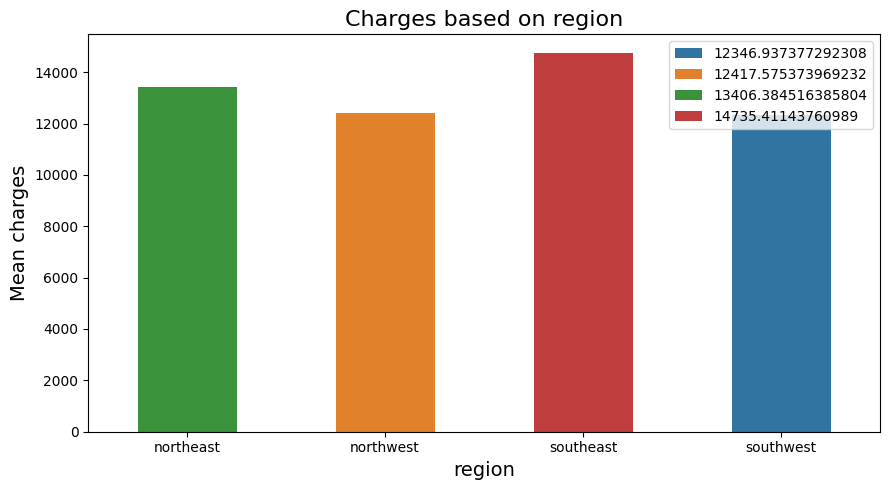

In [108]:
# What are the mean charges based on the region?
regional_charges = reg_data.groupby('region')['charges'].mean()

regional_charges
plt.figure(figsize = (9, 5))
sns.barplot(x = regional_charges.index,
            y = regional_charges.values,
            hue = regional_charges.values,
            palette = 'tab10',
            legend = True,
            width = 0.5)
plt.title('Charges based on region', fontsize = 16)
plt.xlabel('region', fontsize = 14)
plt.ylabel('Mean charges', fontsize = 14)
plt.tight_layout()
plt.show()

In [109]:
# Turn categorical data into numbers
reg_data_encoded = pd.get_dummies(reg_data, columns = ['sex', 'smoker', 'region'])
reg_data_encoded

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


In [113]:
# Split the data
X_train, X_test, y_train, y_test = split(reg_data_encoded.drop('charges', axis = 1),
                                         reg_data_encoded['charges'],
                                         test_size = 0.2,
                                         random_state = 42)

In [115]:
# Scale the data
sc = StandardScaler()

X_train_transformed = sc.fit_transform(X_train)
X_test_transformed = sc.transform(X_test)

In [166]:
# Set the random seed
tf.random.set_seed(42)

# Build the model
model_1 = tf.keras.Sequential([
    layers.Input(shape = (11,)),
    layers.Dense(64, activation = 'relu', ),
    layers.Dense(32, activation = 'relu'),
    layers.Dense(16, activation = 'relu'),
    layers.Dense(1, activation = 'linear')],
    name = 'model_1_dense')

# Compile the model
model_1.compile(loss = 'mae',
                optimizer = tf.keras.optimizers.Adam(lr = 0.1),
                metrics = ['mae'])

In [167]:
# Fit the model
model_1_history = model_1.fit(X_train_transformed,
                              y_train,
                              epochs = 300,
                              validation_data = (X_test_transformed, y_test))

Epoch 1/300
34/34 [==============================] - 2s 15ms/step - loss: 13345.0996 - mae: 13345.0996 - val_loss: 12965.6211 - val_mae: 12965.6211
Epoch 2/300
34/34 [==============================] - 0s 6ms/step - loss: 13339.2412 - mae: 13339.2412 - val_loss: 12954.2959 - val_mae: 12954.2959
Epoch 3/300
34/34 [==============================] - 0s 8ms/step - loss: 13317.9199 - mae: 13317.9199 - val_loss: 12917.9912 - val_mae: 12917.9912
Epoch 4/300
34/34 [==============================] - 0s 7ms/step - loss: 13258.6094 - mae: 13258.6094 - val_loss: 12825.6396 - val_mae: 12825.6396
Epoch 5/300
34/34 [==============================] - 0s 6ms/step - loss: 13121.2461 - mae: 13121.2461 - val_loss: 12626.6768 - val_mae: 12626.6768
Epoch 6/300
34/34 [==============================] - 0s 7ms/step - loss: 12846.2959 - mae: 12846.2959 - val_loss: 12251.6064 - val_mae: 12251.6064
Epoch 7/300
34/34 [==============================] - 0s 7ms/step - loss: 12357.3809 - mae: 12357.3809 - val_loss: 116

In [168]:
# Define a function to plot the loss curves
def plot_loss_curves(history, regression = None, classification = None):
  """
  This function plots the loss curves by accepting an input parameter history.
  """

  plt.figure(figsize = (12,6))

  if classification == True and regression != True:

    # Find the losses and accuracies
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    epochs = range(len(history.history['loss']))

    # Plot the loss and accuracy curves
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label = 'Training loss')
    plt.plot(epochs, val_loss, label = 'Validation loss')
    plt.title('Training Vs. Validation loss curves')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, label = 'Training accuracy')
    plt.plot(epochs, val_accuracy, label = 'Validation accuracy')
    plt.title('Training Vs. Validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

  elif regression == True and classification != True:
    # Find the losses and metric
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    mae = history.history['mae']
    val_mae = history.history['val_mae']
    epochs = range(len(history.history['loss']))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label = 'Training loss')
    plt.plot(epochs, val_loss, label = 'Validation loss')
    plt.title('Training Vs. Validation loss curves')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, mae, label = 'Training error')
    plt.plot(epochs, val_mae, label = 'Validation error')
    plt.title('Training Vs. Validation error')
    plt.xlabel('Epochs')
    plt.ylabel('Mean Absolute Error')
    plt.legend()

  plt.tight_layout()
  plt.show()

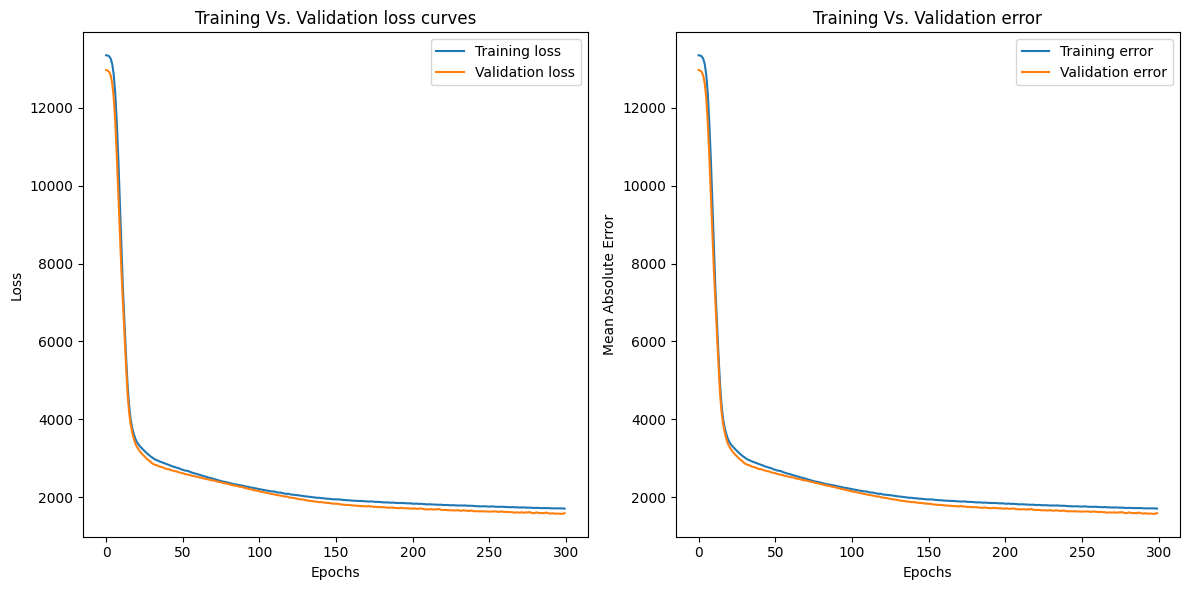

In [169]:
# Lets plot the accuracy and losses
plot_loss_curves(history = model_1_history, regression = True)

In [172]:
# Import the Boston pricing dataset from TensorFlow tf.keras.datasets and model it.
from tensorflow.keras.datasets import boston_housing

In [177]:
# Load the data in the pandas dataframe
(train_data, train_target), (test_data, test_target) = boston_housing.load_data(test_split = 0.2, seed = 42)
len(train_data), len(train_target), len(test_data), len(test_target)

(404, 404, 102, 102)

In [180]:
# Create a DataFrame for the training data
train_df = pd.DataFrame(train_data, columns=["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT"])
train_df["MEDV"] = train_target

In [182]:
train_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.09178,0.0,4.05,0.0,0.510,6.416,84.1,2.6463,5.0,296.0,16.6,395.50,9.04,23.6
1,0.05644,40.0,6.41,1.0,0.447,6.758,32.9,4.0776,4.0,254.0,17.6,396.90,3.53,32.4
2,0.10574,0.0,27.74,0.0,0.609,5.983,98.8,1.8681,4.0,711.0,20.1,390.11,18.07,13.6
3,0.09164,0.0,10.81,0.0,0.413,6.065,7.8,5.2873,4.0,305.0,19.2,390.91,5.52,22.8
4,5.09017,0.0,18.10,0.0,0.713,6.297,91.8,2.3682,24.0,666.0,20.2,385.09,17.27,16.1


In [183]:
# Standardize the data
scaler = StandardScaler()

train_data_trf = scaler.fit_transform(train_data)
test_data_trf = scaler.transform(test_data)

In [201]:
# Set the random seed
tf.random.set_seed(42)

# Build the model
model_2 = tf.keras.Sequential([
    layers.Input(shape = (train_data_trf.shape[1],)),
    #layers.Dense(128, activation = 'relu'),
    layers.Dense(64, activation = 'relu'),
    #layers.Dense(32, activation = 'relu'),
    layers.Dense(1, activation = 'linear')
], name = 'model_2_dense')

# Compile the model
model_2.compile(loss = 'mae',
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['mae'])

# Fit the model
history_model_2 = model_2.fit(train_data_trf,
                              train_target,
                              epochs = 100,
                              validation_data = (test_data_trf, test_target))

Epoch 1/100
13/13 [==============================] - 2s 42ms/step - loss: 21.9650 - mae: 21.9650 - val_loss: 21.8705 - val_mae: 21.8705
Epoch 2/100
13/13 [==============================] - 0s 15ms/step - loss: 21.4177 - mae: 21.4177 - val_loss: 21.3369 - val_mae: 21.3369
Epoch 3/100
13/13 [==============================] - 0s 8ms/step - loss: 20.8489 - mae: 20.8489 - val_loss: 20.7641 - val_mae: 20.7641
Epoch 4/100
13/13 [==============================] - 0s 8ms/step - loss: 20.2348 - mae: 20.2348 - val_loss: 20.1433 - val_mae: 20.1433
Epoch 5/100
13/13 [==============================] - 0s 7ms/step - loss: 19.5589 - mae: 19.5589 - val_loss: 19.4612 - val_mae: 19.4612
Epoch 6/100
13/13 [==============================] - 0s 7ms/step - loss: 18.8285 - mae: 18.8285 - val_loss: 18.7023 - val_mae: 18.7023
Epoch 7/100
13/13 [==============================] - 0s 9ms/step - loss: 18.0372 - mae: 18.0372 - val_loss: 17.8672 - val_mae: 17.8672
Epoch 8/100
13/13 [==============================] - 

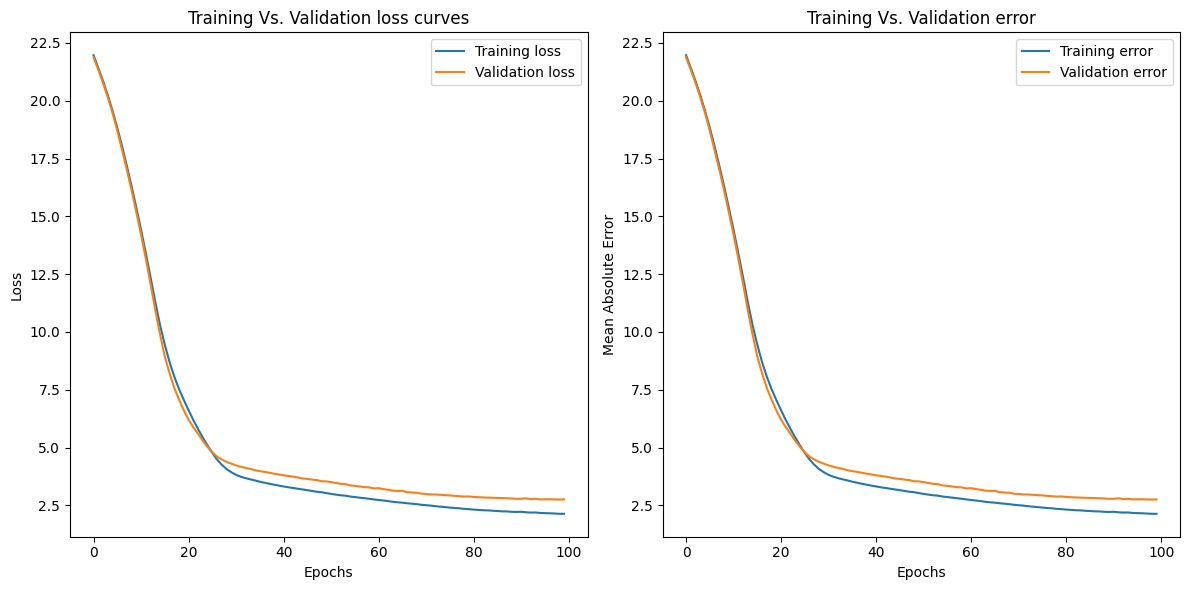

In [202]:
plot_loss_curves(history_model_2, regression = True)